British Airways Customer Review Analysis
In this Jupyter notebook, we'll perform a series of tasks to analyze customer reviews of British Airways. The tasks include web scraping, data preprocessing, sentiment analysis, and word cloud visualization.

Task 1: Web Scraping Reviews
We'll start by scraping customer reviews from the British Airways assigned website [https://www.airlinequality.com/airline-reviews/british-airways].  We want to collect a specified number of pages of reviews, each containing a specific number of reviews per page. We will use python and a package called `BeautifulSoup` for data collection.



In [26]:
!pip install pandas

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Define constants
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

# Define a function to scrape reviews
def scrape_reviews(base_url, pages, page_size):
    reviews = []

    for i in range(1, pages + 1):
        print(f"Scraping page {i}")

        # Create URL to collect links from paginated data
        url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

        try:
            headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
            }
            response = requests.get(url, headers=headers)
            response.raise_for_status()

            # Parse content
            content = response.content
            parsed_content = BeautifulSoup(content, 'html.parser')

            for para in parsed_content.find_all("div", {"class": "text_content"}):
                reviews.append(para.get_text())

            print(f"   ---> {len(reviews)} total reviews")

            # Add a small delay to avoid overloading the website
            time.sleep(1)

        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            continue  # Skip to the next page

    return reviews

# Call the function to scrape reviews
all_reviews = scrape_reviews(base_url, pages, page_size)


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


Task 2: Data Preprocessing
Next, we'll preprocess the scraped reviews. This includes cleaning the text data, removing duplicates, and tokenizing the text into words.

In [3]:
import pandas as pd
import string
import re

# Create a DataFrame from the scraped reviews
df = pd.DataFrame()
df["reviews"] = all_reviews

# Save the DataFrame to a CSV file without the index column
csv_path = "BA_reviews.csv"
df.to_csv(csv_path, index=False)

# Display DataFrame information and statistics
df.info()
df.describe()

# Define a function for data preprocessing
def preprocess_reviews(csv_path):
    # Read the data from the CSV file
    df = pd.read_csv(csv_path)
    df.reset_index(drop=True, inplace=True)

    # Remove punctuation and convert to lowercase
    df['reviews'] = df['reviews'].str.strip().str.lstrip('✅ Trip Verified |').str.lstrip('Not Verified |').str.replace(f"[{string.punctuation}]", '').str.lower()

    # Remove duplicate reviews
    df.drop_duplicates(subset=['reviews'], keep='first', inplace=True)

    # Check for missing values
    missing_values = df['reviews'].isnull().sum()
    print(f"Missing values in 'reviews': {missing_values}")

    # Drop rows with missing values (if applicable)
    df.dropna(subset=['reviews'], inplace=True)

    # Remove leading and trailing whitespaces
    df['reviews'] = df['reviews'].str.strip()

    # Tokenize text into words
    df['tokens'] = df['reviews'].str.split()

    # Return the cleaned DataFrame
    return df

# Call the function with your CSV file path
csv_path = "BA_reviews.csv"
cleaned_df = preprocess_reviews(csv_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
Missing values in 'reviews': 0


Task 3: Sentiment Analysis
Now, let's perform sentiment analysis on the cleaned reviews using VADER Sentiment Analysis.

In [5]:
!pip install vaderSentiment
!pip install nltk

import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize NLTK and download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function for sentiment analysis
def vader_sentiment_analysis(review):
    sentiment_scores = analyzer.polarity_scores(review)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.5:
        return 'Positive'
    elif compound_score <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the 'reviews' column
cleaned_df['Sentiment'] = cleaned_df['reviews'].apply(vader_sentiment_analysis)

# Display the DataFrame with sentiment analysis results
cleaned_df.head()


     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
     - -------------------------------------- 0.1/1.5 MB 272.3 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/1.5 MB 374.1 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.5 MB 374.1 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.5 MB 374.1 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.5 MB 343.4 kB/s eta 0:00:05
     ---- ----------------------------------- 0.2/1.5 MB 398.2 kB/s eta 0:00:04
     ---- ----------------------------------- 0.2/1.5 MB 398.2 kB/s eta 0:00:04
     ---- ----------------------------------- 0.2/1.5 MB 3

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


,reviews,tokens,Sentiment
0,british airways has a total lack of respect fo...,"[british, airways, has, a, total, lack, of, re...",Negative
1,"london heathrow to keflavik, iceland in busine...","[london, heathrow, to, keflavik,, iceland, in,...",Positive
2,mumbai to london heathrow in business class on...,"[mumbai, to, london, heathrow, in, business, c...",Positive
3,care and support shocking. written by a previo...,"[care, and, support, shocking., written, by, a...",Neutral
4,flying a380 business class should be a pleasur...,"[flying, a380, business, class, should, be, a,...",Negative


Task 4: Sentiment Analysis Visualization
Let's visualize the sentiment distribution of the reviews using Seaborn.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


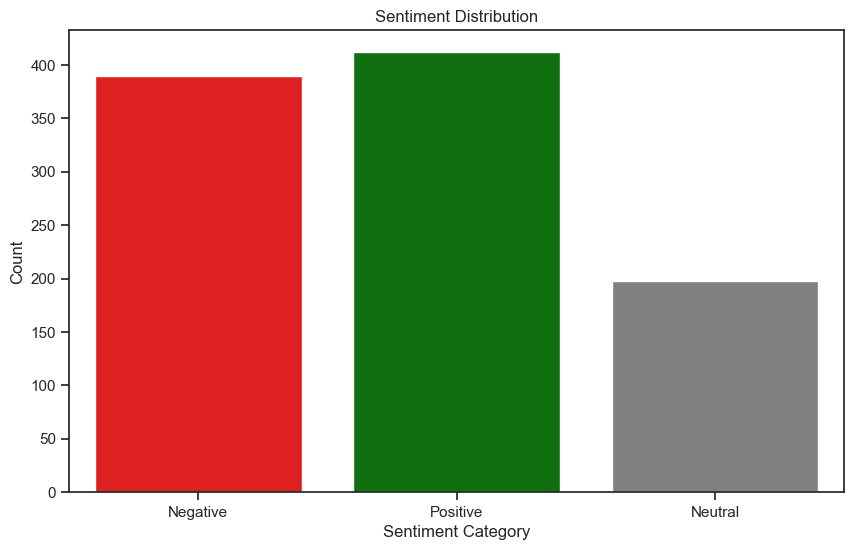

In [14]:
!pip install matplotlib
!pip install seaborn


import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for each sentiment
colors = {"Positive": "green", "Negative": "red", "Neutral": "grey"}
# Create a countplot with custom colors
plt.figure(figsize=(10, 6))
sns.set(style="ticks")
# Use the 'palette' parameter to map sentiment categories to colors
sns.countplot(x='Sentiment', data=cleaned_df, palette=colors)
# Create a countplot to visualize sentiment distribution
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Show the plot
plt.show()


Task 5: Word Cloud Visualization
Finally, we'll generate and visualize word clouds for the reviews.

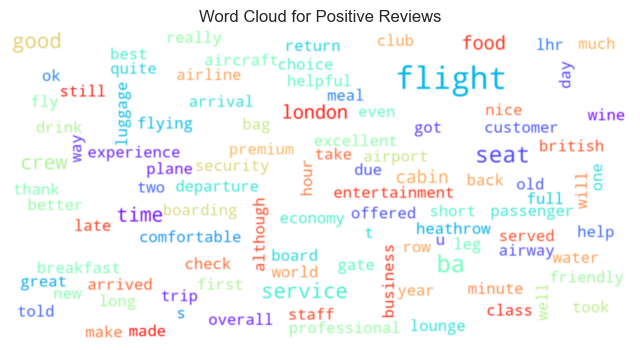

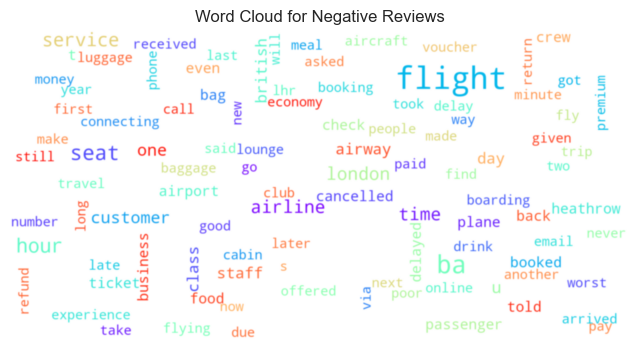

In [24]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define stopwords for the word cloud
stopwords = set(STOPWORDS)

# Define a function to generate and display a word cloud
def generate_and_show_wordcloud(data, title):
    text = " ".join(data)

    wordcloud = WordCloud(width=600, height=300, background_color='white', stopwords=stopwords, max_words=100, max_font_size=30, scale=3, colormap='rainbow', random_state=1, collocations=False).generate(text)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bicubic')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate and display word clouds for positive and negative reviews
positive_reviews = cleaned_df[cleaned_df['Sentiment'] == 'Positive']['reviews'].tolist()
negative_reviews = cleaned_df[cleaned_df['Sentiment'] == 'Negative']['reviews'].tolist()

generate_and_show_wordcloud(positive_reviews, "Word Cloud for Positive Reviews")
generate_and_show_wordcloud(negative_reviews, "Word Cloud for Negative Reviews")
